<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyxirr

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2024-11-15 09:57:04
-------------------
qualified stocks: 87
with latest results: 83
still star stocks: 41
-------------------
Initial Investment:  98.12 L
CY Investment:  1.11 C
Reserve:  400.00
Current:  1.13 C
-------------------
Today PnL: 22.01 K (0.2%)
Current PnL: -7.01 L (-6.3%)
CY Booked + Current PnL: 1.38 L (1.24%)
-------------------
Total profit:  6.78 L
Total loss:  -13.78 L
-------------------
Total Booked + Current PnL: 14.49 L (14.77%)
Total Booked PnL: 21.50 L (21.91%)
Curr Year Booked PnL: 8.39 L (7.43%)
Prev Year Booked PnL: 13.11 L (13.36%)
Est FTT:  1.89 C
Est FTT PnL: 75.64 L (67.01%)
-------------------
Est LTT:  2.37 C
Est LTT PnL: 1.24 C (110.19%)
Deployed:  98.12 L
Current:  1.13 C
CAGR/XIRR %: 13.16%


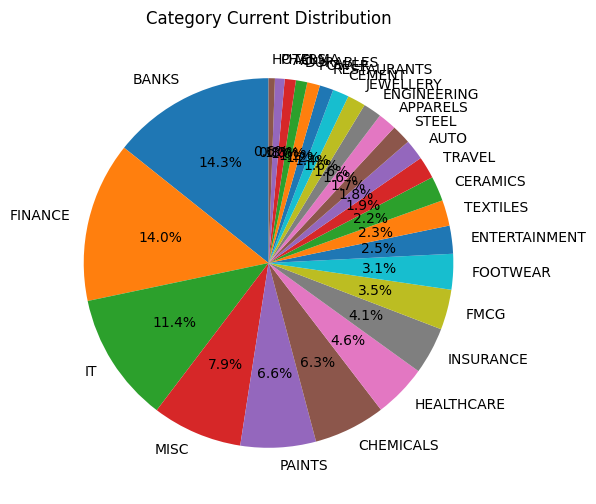

In [ ]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2()
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [ ]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
31,HCLTECH,1349.00,1858.95,2006.00,47.81,94.25,139421.0,38246.0,11028.0,-0.31,37.80,7.91,48.70,96.0,3.47,1.24,47.08,X40,BTT,IT
86,WIPRO,401.00,566.70,611.00,33.50,98.85,238581.0,69760.0,18657.0,-0.40,41.32,7.82,52.37,32.0,3.74,2.11,43.63,XR,NTT,IT
49,LTIM,5051.49,5994.65,7262.39,21.49,67.82,95914.0,15090.0,20286.0,0.79,18.67,21.15,43.77,13.0,0.74,0.85,32.11,X200,ATH,IT
76,TCS,4073.44,4145.90,4998.00,5.35,93.10,99502.0,1739.0,20448.0,-0.11,1.78,20.55,22.70,26.0,0.09,0.88,21.93,X40,BTT,IT
47,LALPATHLAB,2519.90,2956.40,3689.00,-8.59,31.03,106430.0,15714.0,26373.0,-0.03,17.32,24.78,46.39,28.0,0.60,0.94,47.88,X40N,NTT,HEALTHCARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,SAIL,130.64,111.84,228.00,43.77,18.39,192588.0,-32374.0,200022.0,0.13,-14.39,103.86,74.53,36.0,-0.16,1.71,29.09,XSP,BTT,STEEL
18,CAMPUS,294.86,274.60,631.85,5.57,33.33,156247.0,-11528.0,203277.0,-1.89,-6.87,130.10,114.29,11.0,-0.06,1.38,28.02,XSP,ATH,FOOTWEAR
11,BANDHANBNK,223.20,167.26,400.00,-41.28,19.54,163413.0,-54653.0,227389.0,1.31,-25.06,139.15,79.21,-20.0,-0.24,1.45,1.31,XSP,NTT,BANKS
74,TANLA,991.56,713.20,2007.31,-40.47,17.24,157617.0,-61518.0,285996.0,-1.33,-28.07,181.45,102.44,-28.0,-0.22,1.40,0.00,AR,ATH,IT


In [ ]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
49,LTIM,5051.49,5994.65,7262.39,21.49,67.82,95914.0,15090.0,20286.0,0.79,18.67,21.15,43.77,13.0,0.74,0.85,32.11,X200,ATH,IT
76,TCS,4073.44,4145.90,4998.00,5.35,93.10,99502.0,1739.0,20448.0,-0.11,1.78,20.55,22.70,26.0,0.09,0.88,21.93,X40,BTT,IT
47,LALPATHLAB,2519.90,2956.40,3689.00,-8.59,31.03,106430.0,15714.0,26373.0,-0.03,17.32,24.78,46.39,28.0,0.60,0.94,47.88,X40N,NTT,HEALTHCARE
80,TTKPRESTIG,769.29,854.95,1149.24,23.58,81.61,111998.0,11221.0,38550.0,0.58,11.13,34.42,49.39,17.0,0.29,0.99,28.64,X40N,ATH,DURABLES
15,BAYERCROP,4346.57,5892.85,8325.00,13.75,42.53,94286.0,24741.0,38912.0,-3.06,35.58,41.27,91.53,35.0,0.64,0.84,18.84,X40N,BTT,CHEMICALS
82,UNIONBANK,124.65,113.90,163.00,-12.15,89.66,91576.0,-8643.0,39478.0,-1.52,-8.62,43.11,30.77,-34.0,-0.22,0.81,10.19,XSP,NTT,BANKS
22,DABUR,523.35,508.10,735.00,-13.63,50.57,88918.0,-2668.0,39711.0,-0.54,-2.91,44.66,40.44,1.0,-0.07,0.79,3.58,X40,BTT,FMCG
25,FINEORG,4771.46,4766.15,7168.71,-4.97,72.99,81025.0,-90.0,40845.0,1.16,-0.11,50.41,50.24,4.0,-0.00,0.72,18.34,X40N,ATH,CHEMICALS
37,INDUSINDBK,1354.50,1017.15,1800.00,-42.60,1.15,57978.0,-19228.0,44626.0,-1.89,-24.91,76.97,32.89,-17.0,-0.43,0.51,0.00,XR,NTT,BANKS
27,GLAND,1463.94,1774.00,2612.00,2.02,100.00,95796.0,16743.0,45254.0,4.14,21.18,47.24,78.42,30.0,0.37,0.85,10.96,XR,NTT,PHARMA


In [ ]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,318.35,387.00,-8.47,68.97,157265.0,-934.0,33906.0,6.33,-0.59,21.56,20.85,87.0,-0.03,1.39,47.73,XSP,BTT,FINANCE
82,UNIONBANK,124.65,113.90,163.00,-12.15,89.66,91576.0,-8643.0,39478.0,-1.52,-8.62,43.11,30.77,-34.0,-0.22,0.81,10.19,XSP,NTT,BANKS
7,ATULAUTO,656.09,532.15,844.00,NaN,24.14,84080.0,-19582.0,49271.0,-0.30,-18.89,58.60,28.64,-49.0,-0.40,0.74,11.87,XSP,NTT,AUTO
16,BERGEPAINT,558.54,491.90,680.00,-35.13,29.89,155932.0,-21125.0,59628.0,0.44,-11.93,38.24,21.75,-12.0,-0.35,1.38,8.64,XSP,NTT,PAINTS
56,QUESS,716.17,637.15,986.00,-23.82,41.38,111501.0,-13829.0,61047.0,0.19,-11.03,54.75,37.68,-3.0,-0.23,0.99,36.27,XSP,NTT,MISC
68,SHALBY,271.92,215.20,327.00,NaN,16.09,119006.0,-31366.0,61824.0,2.19,-20.86,51.95,20.26,-42.0,-0.51,1.05,2.19,XSP,NTT,HEALTHCARE
52,MEDANTA,1022.60,1071.95,1486.00,-4.78,97.70,162936.0,7501.0,62942.0,3.82,4.83,38.63,45.32,47.0,0.12,1.44,20.65,XSP,NTT,HEALTHCARE
24,EASEMYTRIP,39.93,30.10,52.80,NaN,49.43,92949.0,-30355.0,70102.0,0.23,-24.62,75.42,32.23,-79.0,-0.43,0.82,4.19,XSP,NTT,TRAVEL
78,TITAGARH,1117.46,1110.40,1548.00,7.32,86.21,180995.0,-1151.0,71330.0,1.95,-0.63,39.41,38.53,48.0,-0.02,1.60,34.86,XSP,NTT,ENGINEERING
43,JPPOWER,18.73,16.69,26.20,-66.07,4.60,126393.0,-15449.0,72019.0,0.72,-10.89,56.98,39.88,111.0,-0.21,1.12,29.88,XSP,NTT,POWER


In [ ]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.92
1,20,35.41
2,30,49.41


In [ ]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,35.49
X40,21.69
XR,18.77
X40N,15.91
AR,5.75
SR,1.57
X200,0.85


In [ ]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.28,-12.54,70.66
FINANCE,14.02,-7.43,63.22
IT,11.37,4.17,50.07
MISC,7.90,-8.19,65.17
PAINTS,6.60,-10.55,43.27
CHEMICALS,6.26,-2.40,69.06
HEALTHCARE,4.64,6.53,42.48
INSURANCE,4.12,2.33,49.53
FMCG,3.51,-6.11,46.29
